測試檔案大小每個 64MB 10次實驗 每次分別上傳 1~10個檔案 算時間

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

testList = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

def plotMeanLine(df):
    fig = plt.figure()
    plt.xlabel('files (64MB per file)')
    plt.ylabel('time (sec)')
    plt.plot(testList, df.describe().iloc[1], 'ro')
    plt.plot(testList, df.describe().iloc[1], 'r--')

def plotTop25Line(df):
    fig = plt.figure()
    plt.xlabel('files (64MB per file)')
    plt.ylabel('time (sec)')
    plt.plot(testList, df.describe().iloc[4], 'ro')
    plt.plot(testList, df.describe().iloc[4], 'r--')

每個64MB檔案 逐一上傳 無儲存後端

In [2]:
dfSmallFile = pd.read_csv('minio/small_file_upload.csv')
dfSmallFile

,1-file,2-file,3-file,4-file,5-file,6-file,7-file,8-file,9-file,10-file
0,1.203474,2.534767,3.604909,4.853459,6.279754,11.000842,12.964826,12.918616,14.224927,18.171904
1,1.218454,2.442559,3.691871,6.094504,6.936293,9.888899,11.179858,12.393044,15.187487,12.633184
2,1.220865,2.550694,4.565332,9.907707,6.987871,9.907230,15.140969,13.025887,14.968935,13.454606
3,1.219174,2.440231,4.132675,5.831806,6.788095,9.698550,12.232765,15.497384,13.077813,14.988464
4,1.211198,3.112357,5.015591,8.929742,6.827025,9.025854,13.969041,9.722535,11.077074,12.628283
5,4.155491,2.498924,4.346508,9.564861,6.402325,9.746997,10.419870,11.762854,13.250550,17.530478
6,1.382233,2.472885,5.045232,5.032496,7.917044,8.591088,9.693434,13.415126,14.513778,14.132247
7,1.261643,2.401161,4.356750,10.282180,8.067996,9.490268,9.672819,12.711914,10.924113,12.474065
8,1.195184,2.687454,5.988390,8.776811,7.018639,9.123118,11.861757,13.123613,18.725269,14.879058
9,1.223526,2.526942,4.467098,9.821027,8.833722,9.792260,9.236260,13.737756,14.507583,12.872488


In [3]:
dfSmallFile.describe()

,1-file,2-file,3-file,4-file,5-file,6-file,7-file,8-file,9-file,10-file
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,1.529124,2.566797,4.521436,7.909460,7.205876,9.626511,11.637160,12.830873,14.045753,14.376478
std,0.924396,0.207467,0.700194,2.186760,0.807989,0.648800,1.971299,1.468702,2.227232,2.051179
min,1.195184,2.401161,3.604909,4.853459,6.279754,8.591088,9.236260,9.722535,10.924113,12.474065
25%,1.213012,2.450140,4.186133,5.897481,6.797828,9.214906,9.875043,12.472762,13.120997,12.693010
50%,1.220019,2.512933,4.411924,8.853277,6.962082,9.722773,11.520807,12.972252,14.366255,13.793427
75%,1.252114,2.546712,4.903026,9.756986,7.692443,9.864739,12.781810,13.342247,14.855146,14.961112
max,4.155491,3.112357,5.988390,10.282180,8.833722,11.000842,15.140969,15.497384,18.725269,18.171904


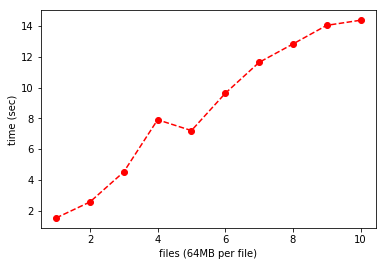

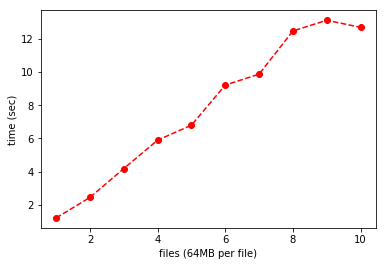

In [4]:
plotMeanLine(dfSmallFile)
plotTop25Line(dfSmallFile)

每個64MB檔案 逐一下載 無儲存後端

In [5]:
dfSmallFileDown = pd.read_csv('minio/small_file_download.csv')
dfSmallFileDown

,1-file,2-file,3-file,4-file,5-file,6-file,7-file,8-file,9-file,10-file
0,2.146520,1.729900,3.446064,2.420653,2.984386,9.202436,8.935214,4.806189,5.350257,12.791091
1,1.255337,3.091568,1.759753,2.502311,3.711060,3.598790,11.181228,12.156128,5.267233,7.091199
2,0.968683,4.384207,4.185287,5.885712,4.728840,3.794878,6.066123,13.107937,12.105905,6.027091
3,1.261719,3.328361,4.865333,6.601039,4.444000,3.602587,4.161102,13.046173,13.132648,6.684308
4,0.585739,3.542402,6.170197,7.704271,6.657677,3.696862,4.521645,12.669558,11.794533,6.944793
5,0.638209,1.190793,6.008055,7.406102,10.447126,4.020724,5.043174,8.105602,13.200716,6.031929
6,0.657821,1.211491,3.058856,5.841450,8.541636,9.267905,4.773008,4.743394,13.660075,10.280273
7,0.665507,1.170153,4.171522,5.931846,9.287343,6.678384,4.255079,7.117210,12.321087,6.727746
8,0.607990,1.195309,1.824116,5.332557,7.579947,8.718119,4.224264,5.549276,5.582741,17.072951
9,1.762716,1.168094,2.044877,2.345419,3.316788,7.465299,12.413012,6.702137,5.850536,13.938288


In [6]:
dfSmallFileDown.describe()

,1-file,2-file,3-file,4-file,5-file,6-file,7-file,8-file,9-file,10-file
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,1.055024,2.201228,3.753406,5.197136,6.169880,6.004598,6.557385,8.800360,9.826573,9.358967
std,0.546279,1.246878,1.623261,2.046320,2.692653,2.506170,3.121093,3.551434,3.755670,3.948596
min,0.585739,1.168094,1.759753,2.345419,2.984386,3.598790,4.161102,4.743394,5.267233,6.027091
25%,0.643112,1.191922,2.298372,3.209873,3.894295,3.721366,4.321720,5.837491,5.649690,6.695167
50%,0.817095,1.470696,3.808793,5.863581,5.693259,5.349554,4.908091,7.611406,11.950219,7.017996
75%,1.260124,3.269163,4.695321,6.433741,8.301214,8.404914,8.217941,12.541201,12.929758,12.163387
max,2.146520,4.384207,6.170197,7.704271,10.447126,9.267905,12.413012,13.107937,13.660075,17.072951


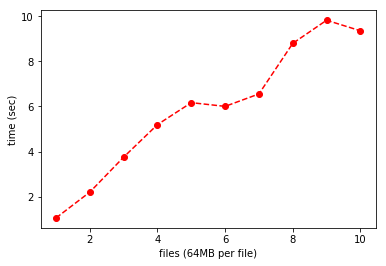

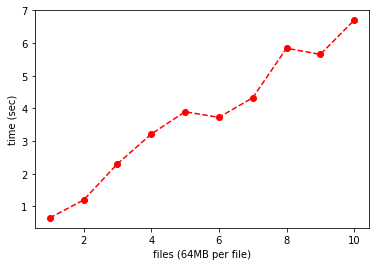

In [7]:
plotMeanLine(dfSmallFileDown)
plotTop25Line(dfSmallFileDown)

每組檔案打包成tar直接上傳 無儲存後端

In [8]:
dfBigFile = pd.read_csv('minio/big_file_upload.csv')
dfBigFile

,1-file,2-file,3-file,4-file,5-file,6-file,7-file,8-file,9-file,10-file
0,1.329562,2.327422,3.474915,4.578424,5.810531,9.835681,7.762435,9.635835,9.976274,11.386045
1,1.757427,2.499994,3.555242,5.772877,6.390345,6.681292,7.687958,8.889306,13.356959,12.016915
2,1.224598,2.312004,5.125419,4.549993,5.627481,6.652333,7.810290,8.870606,12.663670,11.567707
3,1.215845,2.272234,3.483180,9.088186,5.929847,6.719345,8.354406,11.918224,13.273803,13.273385
4,1.261008,2.351741,3.693314,4.527256,5.719597,18.929998,7.853878,25.817957,10.023540,11.283223
5,1.509847,2.273455,3.431046,4.765707,6.342220,6.772183,8.733149,9.861299,10.378334,14.428340
6,1.242829,2.297993,9.193346,4.489326,6.699387,6.829297,8.188787,9.721676,12.538287,12.516342
7,1.175602,3.685575,3.420645,4.441579,5.678459,7.235673,8.342965,21.634984,10.005963,13.628456
8,1.198457,2.298655,3.525517,4.507085,5.669642,6.676154,7.705870,9.039002,11.812965,11.994147
9,1.223728,2.301761,3.455790,4.545005,5.636239,7.465100,9.179239,8.884219,13.250618,12.054671


In [9]:
dfBigFile.describe()

,1-file,2-file,3-file,4-file,5-file,6-file,7-file,8-file,9-file,10-file
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,1.313890,2.462083,4.235841,5.126544,5.950375,8.379706,8.161898,12.427311,11.728041,12.414923
std,0.182993,0.434890,1.816485,1.446516,0.385438,3.831000,0.499170,6.103267,1.478038,1.043291
min,1.175602,2.272234,3.420645,4.441579,5.627481,6.652333,7.687958,8.870606,9.976274,11.283223
25%,1.217816,2.298158,3.460571,4.512128,5.671846,6.690805,7.774399,8.926730,10.112239,11.674317
50%,1.233714,2.306883,3.504349,4.547499,5.765064,6.800740,8.021332,9.678755,12.175626,12.035793
75%,1.312424,2.345661,3.658796,4.718887,6.239127,7.407743,8.351545,11.403993,13.103881,13.084124
max,1.757427,3.685575,9.193346,9.088186,6.699387,18.929998,9.179239,25.817957,13.356959,14.428340


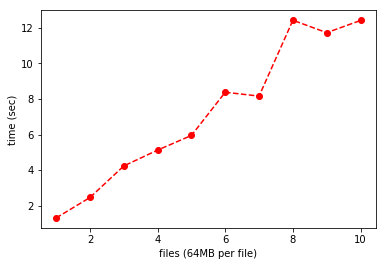

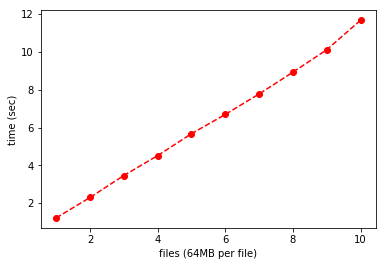

In [10]:
plotMeanLine(dfBigFile)
plotTop25Line(dfBigFile)

每組檔案打包成tar直接下載 無儲存後端

In [11]:
dfBigFileDown = pd.read_csv('minio/big_file_download.csv')
dfBigFileDown

,1-file,2-file,3-file,4-file,5-file,6-file,7-file,8-file,9-file,10-file
0,1.085920,3.344179,3.482557,2.213290,3.368394,8.429537,10.574972,4.523651,10.617159,13.283898
1,1.006259,1.397586,1.761496,2.455741,2.984331,7.611832,9.129135,4.553250,5.259089,12.395768
2,1.577016,1.822583,3.714981,4.972848,2.834825,3.544063,7.052625,10.359585,5.092009,11.662687
3,0.781105,4.312075,4.054828,4.252319,2.965348,3.365494,4.213384,11.497825,7.553464,5.634183
4,0.601296,5.123724,3.547634,4.988787,3.941449,4.222440,6.610688,12.563625,7.042930,5.666061
5,0.574095,1.787102,3.824466,5.244697,7.197127,3.521140,3.947469,13.229045,10.982723,5.648256
6,0.592295,1.117568,5.378345,5.742760,7.453314,4.213556,3.979881,8.610445,14.702643,5.992141
7,0.598933,1.517941,6.467933,4.975838,7.694242,3.491328,3.998086,11.601995,12.762409,5.618026
8,0.644017,1.169737,1.671946,5.974674,7.889347,5.274437,4.009946,5.204798,7.883069,14.185570
9,0.683403,1.155802,1.720626,2.329946,3.639158,7.960154,9.501266,4.890145,6.369586,13.503627


In [12]:
dfBigFileDown.describe()

,1-file,2-file,3-file,4-file,5-file,6-file,7-file,8-file,9-file,10-file
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.814434,2.274830,3.562481,4.315090,4.996753,5.163398,6.301745,8.703436,8.826508,9.359022
std,0.322892,1.453258,1.573744,1.445269,2.235535,2.044826,2.645854,3.587327,3.270699,3.901848
min,0.574095,1.117568,1.671946,2.213290,2.834825,3.365494,3.947469,4.523651,5.092009,5.618026
25%,0.599524,1.226699,2.191761,2.904885,3.080347,3.526871,4.001051,4.968809,6.537922,5.652707
50%,0.663710,1.652522,3.631307,4.974343,3.790303,4.217998,5.412036,9.485015,7.718267,8.827414
75%,0.949971,2.963780,3.997237,5.180720,7.389267,7.027483,8.610008,11.575953,10.891332,13.061866
max,1.577016,5.123724,6.467933,5.974674,7.889347,8.429537,10.574972,13.229045,14.702643,14.185570


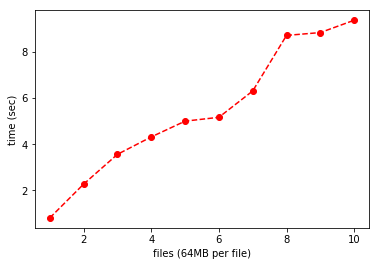

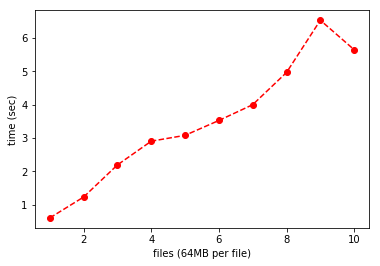

In [13]:
plotMeanLine(dfBigFileDown)
plotTop25Line(dfBigFileDown)

大檔案小檔案 上傳比較

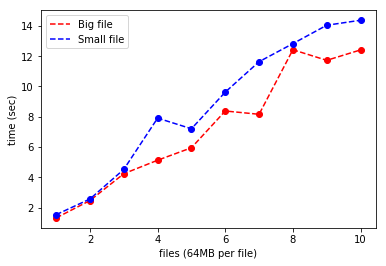

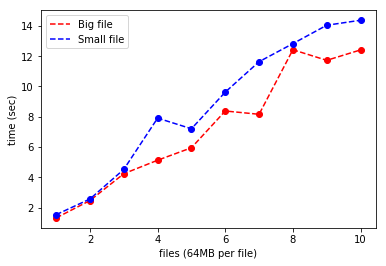

In [14]:
fig = plt.figure()
plt.xlabel('files (64MB per file)')
plt.ylabel('time (sec)')
plt.plot(testList, list(dfBigFile.describe().iloc[1]), 'ro')
plt.plot(testList, dfBigFile.describe().iloc[1], 'r--', label='Big file')
plt.plot(testList, list(dfSmallFile.describe().iloc[1]), 'bo')
plt.plot(testList, dfSmallFile.describe().iloc[1], 'b--', label='Small file')
plt.legend(loc='upper left')

fig = plt.figure()
plt.xlabel('files (64MB per file)')
plt.ylabel('time (sec)')
plt.plot(testList, list(dfBigFile.describe().iloc[1]), 'ro')
plt.plot(testList, dfBigFile.describe().iloc[1], 'r--', label='Big file')
plt.plot(testList, list(dfSmallFile.describe().iloc[1]), 'bo')
plt.plot(testList, dfSmallFile.describe().iloc[1], 'b--', label='Small file')
plt.legend(loc='upper left')

大檔案小檔案 下載比較

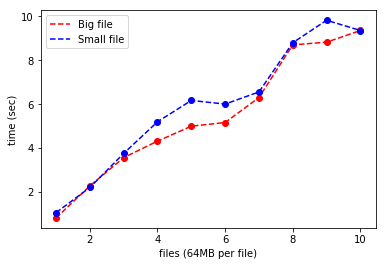

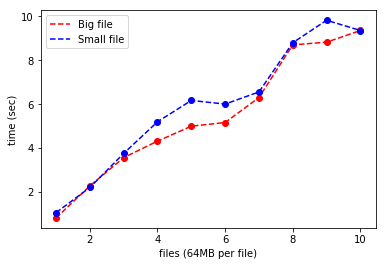

In [15]:
fig = plt.figure()
plt.xlabel('files (64MB per file)')
plt.ylabel('time (sec)')
plt.plot(testList, list(dfBigFileDown.describe().iloc[1]), 'ro')
plt.plot(testList, dfBigFileDown.describe().iloc[1], 'r--', label='Big file')
plt.plot(testList, list(dfSmallFileDown.describe().iloc[1]), 'bo')
plt.plot(testList, dfSmallFileDown.describe().iloc[1], 'b--', label='Small file')
plt.legend(loc='upper left')

fig = plt.figure()
plt.xlabel('files (64MB per file)')
plt.ylabel('time (sec)')
plt.plot(testList, list(dfBigFileDown.describe().iloc[1]), 'ro')
plt.plot(testList, dfBigFileDown.describe().iloc[1], 'r--', label='Big file')
plt.plot(testList, list(dfSmallFileDown.describe().iloc[1]), 'bo')
plt.plot(testList, dfSmallFileDown.describe().iloc[1], 'b--', label='Small file')
plt.legend(loc='upper left')

上傳下載比較

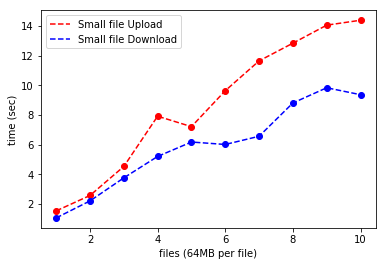

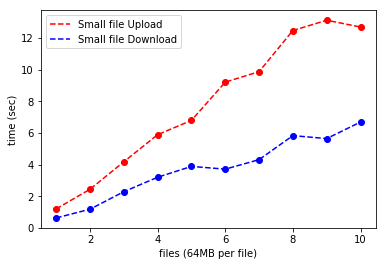

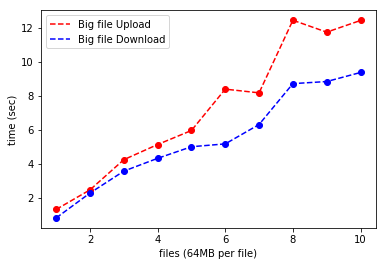

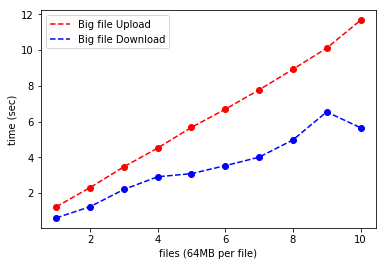

In [16]:
fig = plt.figure()
plt.xlabel('files (64MB per file)')
plt.ylabel('time (sec)')
plt.plot(testList, list(dfSmallFile.describe().iloc[1]), 'ro')
plt.plot(testList, dfSmallFile.describe().iloc[1], 'r--', label='Small file Upload')
plt.plot(testList, list(dfSmallFileDown.describe().iloc[1]), 'bo')
plt.plot(testList, dfSmallFileDown.describe().iloc[1], 'b--', label='Small file Download')
plt.legend(loc='upper left')

fig = plt.figure()
plt.xlabel('files (64MB per file)')
plt.ylabel('time (sec)')
plt.plot(testList, list(dfSmallFile.describe().iloc[4]), 'ro')
plt.plot(testList, dfSmallFile.describe().iloc[4], 'r--', label='Small file Upload')
plt.plot(testList, list(dfSmallFileDown.describe().iloc[4]), 'bo')
plt.plot(testList, dfSmallFileDown.describe().iloc[4], 'b--', label='Small file Download')
plt.legend(loc='upper left')

fig = plt.figure()
plt.xlabel('files (64MB per file)')
plt.ylabel('time (sec)')
plt.plot(testList, list(dfBigFile.describe().iloc[1]), 'ro')
plt.plot(testList, dfBigFile.describe().iloc[1], 'r--', label='Big file Upload')
plt.plot(testList, list(dfBigFileDown.describe().iloc[1]), 'bo')
plt.plot(testList, dfBigFileDown.describe().iloc[1], 'b--', label='Big file Download')
plt.legend(loc='upper left')

fig = plt.figure()
plt.xlabel('files (64MB per file)')
plt.ylabel('time (sec)')
plt.plot(testList, list(dfBigFile.describe().iloc[4]), 'ro')
plt.plot(testList, dfBigFile.describe().iloc[4], 'r--', label='Big file Upload')
plt.plot(testList, list(dfBigFileDown.describe().iloc[4]), 'bo')
plt.plot(testList, dfBigFileDown.describe().iloc[4], 'b--', label='Big file Download')
plt.legend(loc='upper left')

每個64MB檔案 逐一上傳 Longhorn

In [17]:
dfSmallFileLonghorn = pd.read_csv('minio/small_file_longhorn_upload.csv')
dfSmallFileLonghorn

,1-file,2-file,3-file,4-file,5-file,6-file,7-file,8-file,9-file,10-file
0,0.662904,9.975862,1.979610,3.159178,3.541974,6.149829,68.998281,93.915074,6.627079,70.870325
1,100.781598,1.307935,2.211611,3.714423,3.655913,4.317076,192.944644,5.223233,6.425130,197.913232
2,0.774700,1.283130,2.013537,3.705752,3.729944,206.571605,5.579463,6.227637,181.261071,7.449810
3,0.770631,1.337337,2.664069,34.051704,128.436169,4.305038,5.450019,8.523153,183.836850,7.402615
4,137.125154,1.658912,2.272817,2.969794,4.225247,38.693455,108.841498,6.066153,6.697669,148.145207
5,1.113342,1.257240,1.983611,2.749937,3.740019,210.969464,4.867433,6.155560,53.246335,116.391393
6,0.631431,1.405249,2.211043,2.828814,147.039968,4.180975,5.275445,10.282409,94.235480,6.966543
7,0.874229,1.465511,20.397114,119.265070,3.502187,4.750898,22.522059,107.347161,6.663525,142.193400
8,0.688842,1.427548,2.246645,3.117704,69.564557,102.246079,5.497076,6.086933,193.925276,8.382010
9,0.714859,1.459804,2.540858,166.554605,4.073687,3.947906,4.793630,228.380821,7.139267,7.573291


In [18]:
dfSmallFileLonghorn.describe()

,1-file,2-file,3-file,4-file,5-file,6-file,7-file,8-file,9-file,10-file
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,24.413769,2.257853,4.052092,34.211698,37.150966,58.613233,42.476955,47.820813,74.005768,71.328783
std,50.557930,2.714333,5.747482,59.152649,57.013069,84.922779,63.652484,74.527496,82.617571,74.022267
min,0.631431,1.257240,1.979610,2.749937,3.502187,3.947906,4.793630,5.223233,6.425130,6.966543
25%,0.695346,1.315285,2.062914,3.006772,3.674420,4.308047,5.319088,6.104089,6.672061,7.480680
50%,0.772666,1.416399,2.229128,3.432465,3.906853,5.450364,5.538270,7.375395,30.192801,39.626167
75%,1.053564,1.464084,2.473848,26.467384,53.229730,86.357923,57.379226,73.006907,159.504673,135.742898
max,137.125154,9.975862,20.397114,166.554605,147.039968,210.969464,192.944644,228.380821,193.925276,197.913232


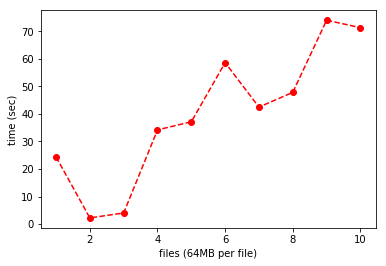

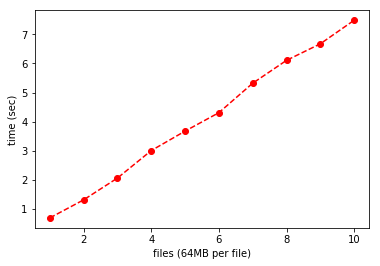

In [19]:
plotMeanLine(dfSmallFileLonghorn)
plotTop25Line(dfSmallFileLonghorn)

每個64MB檔案 逐一下載 Longhorn

In [20]:
dfSmallFileLonghornDown = pd.read_csv('minio/small_file_longhorn_download.csv')
dfSmallFileLonghornDown

,1-file,2-file,3-file,4-file,5-file,6-file,7-file,8-file,9-file,10-file
0,4.639526,19.526288,6.271317,16.182620,34.375021,38.825041,39.126462,52.177262,40.311908,39.921044
1,12.211274,4.331274,7.349869,15.358915,40.838502,31.897103,34.578348,41.016642,118.495173,84.398381
2,7.829325,12.664699,27.276555,28.471434,40.168368,36.600541,45.056703,23.670181,44.440093,39.093453
3,9.198061,4.589045,27.507945,29.254615,26.822759,39.219710,38.904839,57.787014,45.451102,47.450892
4,8.033161,10.891613,25.904451,26.135421,19.814390,12.969646,19.158902,55.066109,48.911360,48.687685
5,4.490436,4.372453,27.055382,25.445311,10.893731,38.628476,40.367697,41.424313,60.390157,46.073197
6,7.021409,18.748868,20.289951,10.987247,13.900363,14.404381,41.453669,41.478691,48.030279,56.012425
7,6.236963,17.848241,21.207817,30.210006,36.983949,33.089607,22.495981,44.139427,56.632031,68.349807
8,7.430078,11.631288,6.686997,14.863320,37.670424,36.893795,52.518417,33.865206,57.311858,65.992574
9,3.791099,7.494654,19.616555,27.804702,28.879148,33.592785,44.333367,44.995167,52.229231,53.521500


In [21]:
dfSmallFileLonghornDown.describe()

,1-file,2-file,3-file,4-file,5-file,6-file,7-file,8-file,9-file,10-file
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,7.088133,11.209842,18.916684,22.471359,29.034665,31.612108,37.799438,43.562001,57.220319,54.950096
std,2.507784,6.001539,8.879760,7.245816,10.942514,9.785174,10.148790,10.090737,22.437963,14.233841
min,3.791099,4.331274,6.271317,10.987247,10.893731,12.969646,19.158902,23.670181,40.311908,39.093453
25%,5.038885,5.315447,10.416541,15.564841,21.566482,32.195229,35.659971,41.118560,46.095896,46.417621
50%,7.225744,11.261451,20.748884,25.790366,31.627085,35.096663,39.747079,42.809059,50.570296,51.104593
75%,7.982202,16.552355,26.767649,28.304751,37.498805,38.194805,43.613443,50.381738,57.141901,63.497537
max,12.211274,19.526288,27.507945,30.210006,40.838502,39.219710,52.518417,57.787014,118.495173,84.398381


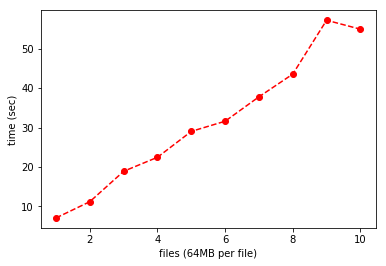

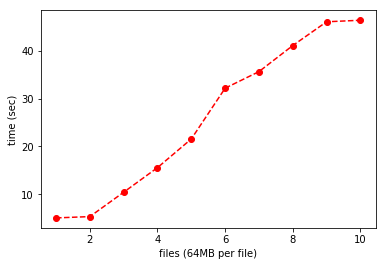

In [22]:
plotMeanLine(dfSmallFileLonghornDown)
plotTop25Line(dfSmallFileLonghornDown)

每組檔案打包成tar直接上傳 Longhorn

In [23]:
dfBigFileLonghorn = pd.read_csv('minio/big_file_longhorn_upload.csv')
dfBigFileLonghorn

,1-file,2-file,3-file,4-file,5-file,6-file,7-file,8-file,9-file,10-file
0,0.830501,1.457849,1.977934,2.514634,3.023250,3.600034,103.341667,4.878323,5.327220,86.450205
1,0.708103,1.353119,1.820843,2.391442,3.030798,3.586709,4.496773,4.715634,5.593925,5.946340
2,0.748563,1.340106,2.190282,2.409989,3.057714,3.679493,4.270734,4.850671,5.480045,6.124240
3,0.622917,1.239204,1.875685,86.436920,3.156448,3.603038,4.115977,43.983082,5.450186,56.638263
4,0.965626,1.595165,1.957721,2.615490,3.220711,39.816208,4.854414,5.038129,107.961730,5.954326
5,0.643505,1.365027,1.844362,2.528209,3.408031,3.641674,4.263556,4.919055,90.934078,5.971770
6,0.637555,1.267170,1.834172,4.623978,3.242862,3.574574,4.320061,25.191743,5.458944,6.061843
7,1.017354,1.426065,63.607641,2.454534,3.352658,3.752778,72.898789,4.852620,42.667085,6.050618
8,0.919404,1.457661,1.882363,2.604268,65.607167,3.592961,4.264441,4.850825,5.523916,5.904202
9,0.663028,1.235571,18.080135,2.531591,2.984807,3.570298,4.212811,4.780580,5.440361,96.344536


In [24]:
dfBigFileLonghorn.describe()

,1-file,2-file,3-file,4-file,5-file,6-file,7-file,8-file,9-file,10-file
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.775655,1.373694,9.707114,11.111106,9.408445,7.241777,21.103922,10.806066,27.983749,28.144634
std,0.147583,0.113561,19.607900,26.475260,19.746740,11.445628,36.042751,13.293696,39.614304,36.960629
min,0.622917,1.235571,1.820843,2.391442,2.984807,3.570298,4.115977,4.715634,5.327220,5.904202
25%,0.648386,1.285404,1.852192,2.469559,3.037527,3.588272,4.263777,4.850710,5.452375,5.958687
50%,0.728333,1.359073,1.920042,2.529900,3.188579,3.601536,4.295398,4.865471,5.501981,6.056230
75%,0.897178,1.449762,2.137195,2.612685,3.325209,3.670039,4.765004,5.008361,33.398795,44.009757
max,1.017354,1.595165,63.607641,86.436920,65.607167,39.816208,103.341667,43.983082,107.961730,96.344536


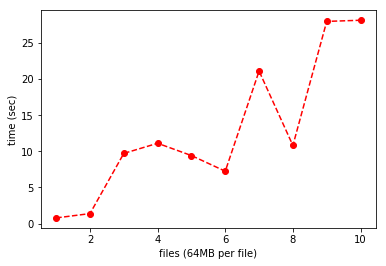

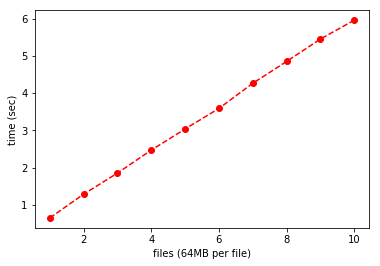

In [25]:
plotMeanLine(dfBigFileLonghorn)
plotTop25Line(dfBigFileLonghorn)

每組檔案打包成tar直接下載 Longhorn

In [26]:
dfBigFileLonghornDown = pd.read_csv('minio/big_file_longhorn_download.csv')
dfBigFileLonghornDown

,1-file,2-file,3-file,4-file,5-file,6-file,7-file,8-file,9-file,10-file
0,3.618330,10.333779,19.832875,8.900874,10.586554,13.266368,29.817652,23.058686,59.681613,49.250807
1,4.359485,4.280196,29.588735,29.884648,56.332804,28.221261,21.311001,44.317795,95.626509,90.713781
2,10.792284,16.161040,16.582863,25.720925,37.727136,28.062729,46.879471,62.429728,47.285094,57.502231
3,4.125466,5.031106,16.890073,24.852268,29.254048,12.740168,37.139043,31.365011,38.282243,57.355845
4,9.850987,16.210656,17.174463,26.406819,34.158361,36.639326,51.725017,46.204805,44.223041,44.507465
5,4.600268,6.677111,24.319161,31.189641,35.017949,14.452856,16.373902,44.413959,59.085722,40.831000
6,4.935231,15.179134,20.955217,33.029193,38.320316,36.689780,15.381136,41.345540,44.535177,52.605662
7,6.317172,12.867519,14.925158,9.839188,19.577591,40.163611,33.023874,33.177067,54.595564,65.059430
8,12.761397,4.520708,29.669887,11.236552,35.153262,28.793735,47.163035,36.858648,49.672373,64.232911
9,5.496829,15.561161,8.231845,21.057935,26.266563,37.433598,35.772396,43.643270,47.529682,55.772179


In [27]:
dfBigFileLonghornDown.describe()

,1-file,2-file,3-file,4-file,5-file,6-file,7-file,8-file,9-file,10-file
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,6.685745,10.682241,19.817028,22.211804,32.239458,27.646343,33.458653,40.681451,54.051702,57.783131
std,3.234096,5.125432,6.652376,9.100819,12.207614,10.645793,12.910736,10.583795,16.087064,13.930391
min,3.618330,4.280196,8.231845,8.900874,10.586554,12.740168,15.381136,23.058686,38.282243,40.831000
25%,4.419681,5.442607,16.659666,13.691898,27.013435,17.855324,23.437664,34.097462,45.222656,50.089521
50%,5.216030,11.600649,18.503669,25.286596,34.588155,28.507498,34.398135,42.494405,48.601027,56.564012
75%,8.967533,15.465654,23.478175,29.015190,37.083667,36.677167,44.444364,44.389918,57.963183,62.550241
max,12.761397,16.210656,29.669887,33.029193,56.332804,40.163611,51.725017,62.429728,95.626509,90.713781


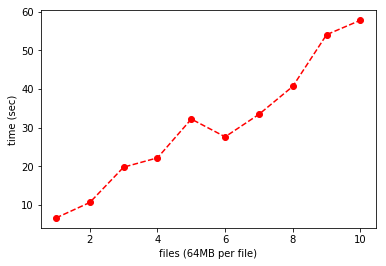

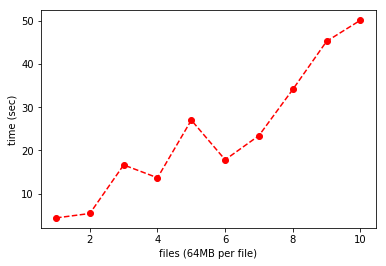

In [28]:
plotMeanLine(dfBigFileLonghornDown)
plotTop25Line(dfBigFileLonghornDown)

大檔案小檔案 上傳比較 Longhorn

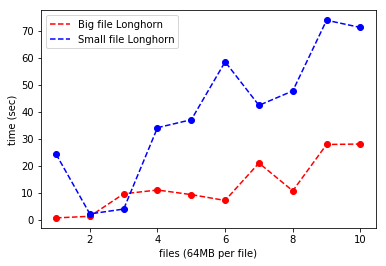

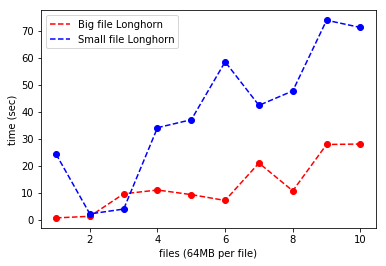

In [29]:
fig = plt.figure()
plt.xlabel('files (64MB per file)')
plt.ylabel('time (sec)')
plt.plot(testList, list(dfBigFileLonghorn.describe().iloc[1]), 'ro')
plt.plot(testList, dfBigFileLonghorn.describe().iloc[1], 'r--', label='Big file Longhorn')
plt.plot(testList, list(dfSmallFileLonghorn.describe().iloc[1]), 'bo')
plt.plot(testList, dfSmallFileLonghorn.describe().iloc[1], 'b--', label='Small file Longhorn')
plt.legend(loc='upper left')

fig = plt.figure()
plt.xlabel('files (64MB per file)')
plt.ylabel('time (sec)')
plt.plot(testList, list(dfBigFileLonghorn.describe().iloc[1]), 'ro')
plt.plot(testList, dfBigFileLonghorn.describe().iloc[1], 'r--', label='Big file Longhorn')
plt.plot(testList, list(dfSmallFileLonghorn.describe().iloc[1]), 'bo')
plt.plot(testList, dfSmallFileLonghorn.describe().iloc[1], 'b--', label='Small file Longhorn')
plt.legend(loc='upper left')

大檔案小檔案 下載比較 Longhorn

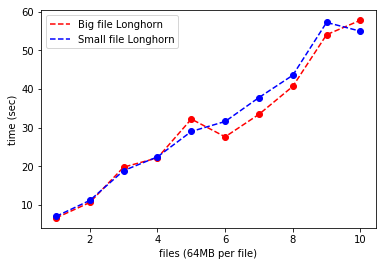

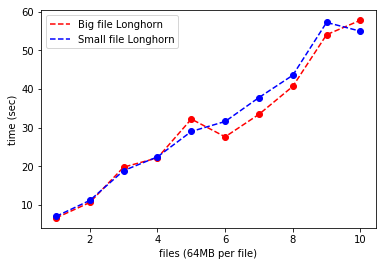

In [30]:
fig = plt.figure()
plt.xlabel('files (64MB per file)')
plt.ylabel('time (sec)')
plt.plot(testList, list(dfBigFileLonghornDown.describe().iloc[1]), 'ro')
plt.plot(testList, dfBigFileLonghornDown.describe().iloc[1], 'r--', label='Big file Longhorn')
plt.plot(testList, list(dfSmallFileLonghornDown.describe().iloc[1]), 'bo')
plt.plot(testList, dfSmallFileLonghornDown.describe().iloc[1], 'b--', label='Small file Longhorn')
plt.legend(loc='upper left')

fig = plt.figure()
plt.xlabel('files (64MB per file)')
plt.ylabel('time (sec)')
plt.plot(testList, list(dfBigFileLonghornDown.describe().iloc[1]), 'ro')
plt.plot(testList, dfBigFileLonghornDown.describe().iloc[1], 'r--', label='Big file Longhorn')
plt.plot(testList, list(dfSmallFileLonghornDown.describe().iloc[1]), 'bo')
plt.plot(testList, dfSmallFileLonghornDown.describe().iloc[1], 'b--', label='Small file Longhorn')
plt.legend(loc='upper left')

上傳下載比較

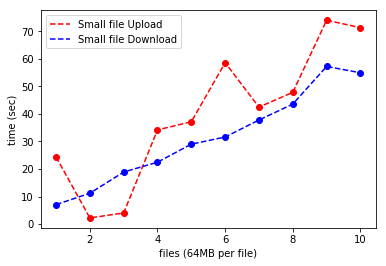

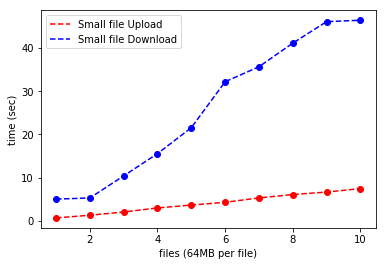

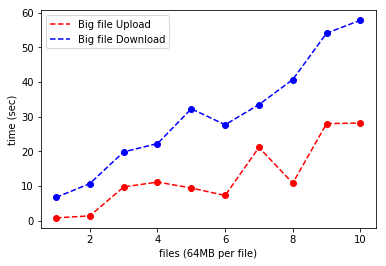

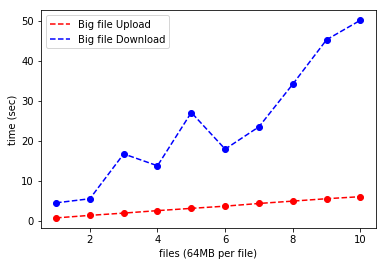

In [31]:
fig = plt.figure()
plt.xlabel('files (64MB per file)')
plt.ylabel('time (sec)')
plt.plot(testList, list(dfSmallFileLonghorn.describe().iloc[1]), 'ro')
plt.plot(testList, dfSmallFileLonghorn.describe().iloc[1], 'r--', label='Small file Upload')
plt.plot(testList, list(dfSmallFileLonghornDown.describe().iloc[1]), 'bo')
plt.plot(testList, dfSmallFileLonghornDown.describe().iloc[1], 'b--', label='Small file Download')
plt.legend(loc='upper left')

fig = plt.figure()
plt.xlabel('files (64MB per file)')
plt.ylabel('time (sec)')
plt.plot(testList, list(dfSmallFileLonghorn.describe().iloc[4]), 'ro')
plt.plot(testList, dfSmallFileLonghorn.describe().iloc[4], 'r--', label='Small file Upload')
plt.plot(testList, list(dfSmallFileLonghornDown.describe().iloc[4]), 'bo')
plt.plot(testList, dfSmallFileLonghornDown.describe().iloc[4], 'b--', label='Small file Download')
plt.legend(loc='upper left')

fig = plt.figure()
plt.xlabel('files (64MB per file)')
plt.ylabel('time (sec)')
plt.plot(testList, list(dfBigFileLonghorn.describe().iloc[1]), 'ro')
plt.plot(testList, dfBigFileLonghorn.describe().iloc[1], 'r--', label='Big file Upload')
plt.plot(testList, list(dfBigFileLonghornDown.describe().iloc[1]), 'bo')
plt.plot(testList, dfBigFileLonghornDown.describe().iloc[1], 'b--', label='Big file Download')
plt.legend(loc='upper left')

fig = plt.figure()
plt.xlabel('files (64MB per file)')
plt.ylabel('time (sec)')
plt.plot(testList, list(dfBigFileLonghorn.describe().iloc[4]), 'ro')
plt.plot(testList, dfBigFileLonghorn.describe().iloc[4], 'r--', label='Big file Upload')
plt.plot(testList, list(dfBigFileLonghornDown.describe().iloc[4]), 'bo')
plt.plot(testList, dfBigFileLonghornDown.describe().iloc[4], 'b--', label='Big file Download')
plt.legend(loc='upper left')

每個64MB檔案 逐一上傳 NFS-Provider

In [32]:
dfSmallFileNfs = pd.read_csv('minio/small_file_nfs_upload.csv')
dfSmallFileNfs

,1-file,2-file,3-file,4-file,5-file,6-file,7-file,8-file,9-file,10-file
0,2.934222,7.433288,11.872686,14.562149,18.546615,26.611202,32.496305,28.463962,38.669873,37.241124
1,3.693185,7.057481,10.407131,13.350111,18.452016,27.880728,30.749170,26.793011,38.146819,34.797605
2,3.706293,7.169654,10.464007,12.355150,17.093923,20.445596,22.109011,25.384697,29.957493,33.009575
3,4.452496,7.158934,15.643665,13.229040,22.909487,20.965446,24.054448,31.364803,29.173251,38.746276
4,3.693193,7.430440,9.515862,17.730000,16.902209,20.647073,24.644127,28.838531,28.859805,33.593562
5,4.039594,7.284884,10.685487,14.208657,18.186683,20.622630,22.171984,26.960251,30.703941,39.747235
6,9.019354,6.166809,9.593564,14.458458,16.246802,20.554934,29.245955,24.581862,31.079465,42.095951
7,3.565328,6.350022,9.060698,12.251026,16.200801,19.334543,24.464693,31.843149,31.593017,34.886548
8,8.412810,7.069114,9.660723,13.771705,17.434157,25.894137,23.116652,29.780064,29.442712,32.741400
9,3.684406,7.229878,9.669300,13.622628,20.913025,24.350530,22.912774,26.596698,35.979987,38.207700


In [33]:
dfSmallFileNfs.describe()

,1-file,2-file,3-file,4-file,5-file,6-file,7-file,8-file,9-file,10-file
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,4.720088,7.035050,10.657312,13.953892,18.288572,22.730682,25.596512,28.060703,32.360636,36.506698
std,2.144419,0.431217,1.926269,1.543340,2.133102,3.119889,3.790099,2.430649,3.772208,3.173307
min,2.934222,6.166809,9.060698,12.251026,16.200801,19.334543,22.109011,24.581862,28.859805,32.741400
25%,3.686600,7.060389,9.610354,13.259308,16.950138,20.571858,22.963744,26.645777,29.571407,33.894573
50%,3.699743,7.164294,10.038215,13.697166,17.810420,20.806259,24.259570,27.712106,30.891703,36.063836
75%,4.349271,7.271133,10.630117,14.396007,18.522965,25.508236,28.095498,29.544681,34.883244,38.611632
max,9.019354,7.433288,15.643665,17.730000,22.909487,27.880728,32.496305,31.843149,38.669873,42.095951


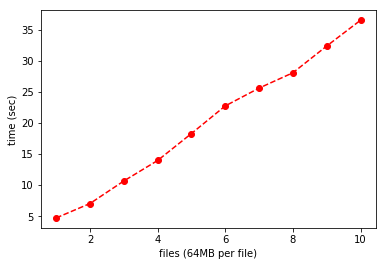

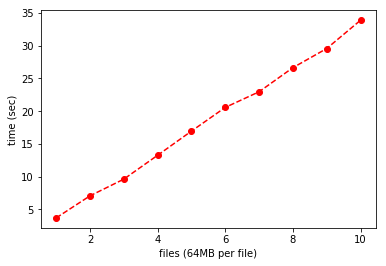

In [34]:
plotMeanLine(dfSmallFileNfs)
plotTop25Line(dfSmallFileNfs)

每個64MB檔案 逐一下載 NFS-Provider

In [35]:
dfSmallFileNfsDown = pd.read_csv('minio/small_file_nfs_download.csv')
dfSmallFileNfsDown

,1-file,2-file,3-file,4-file,5-file,6-file,7-file,8-file,9-file,10-file
0,0.634053,1.156462,1.687624,2.436867,2.859887,3.448623,4.014570,4.893994,5.130337,5.750266
1,0.587891,1.185835,2.523370,2.293187,2.922214,3.599047,3.993494,4.607654,5.172052,5.800998
2,0.584017,1.154895,1.770940,2.282660,2.885401,3.516909,4.770300,5.439250,5.444738,35.011516
3,2.096606,6.475705,9.490086,3.724336,4.667737,11.061767,12.318691,8.535089,15.326378,19.255021
4,0.782766,1.955457,3.069432,4.501827,14.543324,5.748394,22.814206,7.522001,24.381197,9.764424
5,3.632584,6.559845,5.409551,3.851551,5.225871,15.551583,7.113256,9.497348,14.249679,18.342412
6,1.176106,2.040403,3.640150,3.584796,4.617615,17.170561,6.294986,18.096244,9.215616,16.985364
7,2.209361,6.403041,9.759745,3.807602,4.593374,13.948455,9.455183,8.065683,16.266842,17.072354
8,0.905184,1.966205,2.632887,4.099245,15.545614,7.699373,7.541578,23.903589,23.828431,9.020857
9,1.037256,3.129908,7.981536,9.369338,4.543321,17.401278,8.569859,7.648572,17.100614,10.079450


In [36]:
dfSmallFileNfsDown.describe()

,1-file,2-file,3-file,4-file,5-file,6-file,7-file,8-file,9-file,10-file
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,1.364582,3.202776,4.796532,3.995141,6.240436,9.914599,8.688612,9.820943,13.611588,14.708266
std,0.990610,2.336053,3.165284,2.046800,4.725211,5.801847,5.598437,6.256529,7.242767,8.785565
min,0.584017,1.154895,1.687624,2.282660,2.859887,3.448623,3.993494,4.607654,5.130337,5.750266
25%,0.671231,1.378241,2.550749,2.723850,3.327491,4.136384,5.151472,5.959938,6.387457,9.206749
50%,0.971220,2.003304,3.354791,3.765969,4.605495,9.380570,7.327417,7.857128,14.788029,13.532407
75%,1.866481,5.584758,7.338540,4.037322,5.086338,15.150801,9.233852,9.256783,16.892171,18.024897
max,3.632584,6.559845,9.759745,9.369338,15.545614,17.401278,22.814206,23.903589,24.381197,35.011516


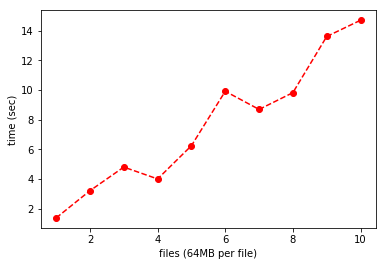

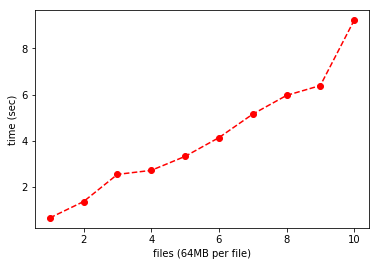

In [37]:
plotMeanLine(dfSmallFileNfsDown)
plotTop25Line(dfSmallFileNfsDown)

每組檔案打包成tar直接上傳 NFS-Provider

In [38]:
dfBigFileNfs = pd.read_csv('minio/big_file_nfs_upload.csv')
dfBigFileNfs

,1-file,2-file,3-file,4-file,5-file,6-file,7-file,8-file,9-file,10-file
0,3.977292,7.406439,12.177583,11.539773,19.923647,21.697556,31.703340,38.435287,27.375658,30.964821
1,3.933133,6.276208,10.124248,12.165947,16.328022,19.853990,21.129256,27.710719,26.535848,28.845206
2,3.602364,10.323403,8.367644,12.138909,13.597438,17.725980,19.947713,24.916065,29.292055,30.514479
3,3.601476,6.715874,9.359606,14.106864,15.757503,17.805081,20.916530,22.441723,26.223157,28.730615
4,3.815856,5.470007,9.667533,11.507249,14.820586,18.379940,21.475914,25.174331,25.057638,29.885491
5,3.185929,6.159995,8.844509,19.727479,14.217861,17.779293,20.770188,23.079614,25.323511,28.944270
6,3.294770,6.151085,13.229636,11.440997,15.752202,23.395339,20.851561,22.037206,26.349614,28.591552
7,3.331180,5.737706,8.269977,12.510215,15.588515,19.006343,23.648745,25.159439,27.341223,30.908826
8,3.841921,6.610850,9.184798,12.025760,15.088694,18.144303,22.070214,29.883122,27.100213,49.421636
9,3.749361,6.332009,9.000359,12.725907,14.160501,19.186137,31.792042,39.233062,34.688120,26.794211


In [39]:
dfBigFileNfs.describe()

,1-file,2-file,3-file,4-file,5-file,6-file,7-file,8-file,9-file,10-file
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,3.633328,6.718358,9.822589,12.988910,15.523497,19.297396,23.430550,27.807057,27.528704,31.360111
std,0.280186,1.373550,1.634704,2.493887,1.766200,1.889536,4.491318,6.276569,2.782052,6.472642
min,3.185929,5.470007,8.269977,11.440997,13.597438,17.725980,19.947713,22.037206,25.057638,26.794211
25%,3.398754,6.153313,8.883472,11.661269,14.368542,17.889886,20.867803,23.538727,26.254771,28.759263
50%,3.675863,6.304109,9.272202,12.152428,15.338605,18.693141,21.302585,25.166885,26.818030,29.414880
75%,3.835405,6.689618,10.010069,12.671984,15.756178,19.687027,23.254112,29.340021,27.367049,30.810239
max,3.977292,10.323403,13.229636,19.727479,19.923647,23.395339,31.792042,39.233062,34.688120,49.421636


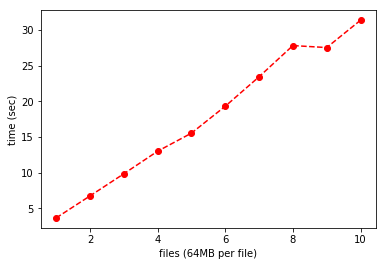

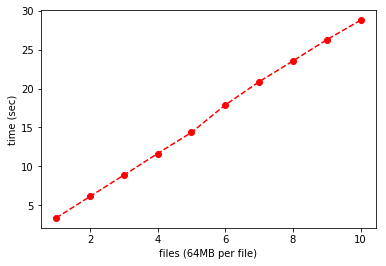

In [40]:
plotMeanLine(dfBigFileNfs)
plotTop25Line(dfBigFileNfs)

每組檔案打包成tar直接下載 NFS-Provider

In [41]:
dfBigFileNfsDown = pd.read_csv('minio/big_file_nfs_download.csv')
dfBigFileNfsDown

,1-file,2-file,3-file,4-file,5-file,6-file,7-file,8-file,9-file,10-file
0,0.550922,1.101065,2.586527,2.206135,2.775028,3.325420,3.865698,4.380793,5.839846,6.268293
1,0.574169,1.141645,1.684508,2.457967,2.992967,3.348820,4.076701,4.662910,5.202756,5.522234
2,0.560291,1.132634,2.429649,2.212648,3.652194,3.569679,3.888046,4.750856,11.750319,11.106247
3,2.798961,6.499488,7.533034,3.216212,3.900830,17.753705,7.081563,21.661187,8.037997,20.447488
4,0.852811,1.688697,2.364300,6.651978,13.369669,6.098002,11.412965,6.983038,13.217076,14.913759
5,3.688284,5.935504,2.159169,3.648023,3.598661,15.967912,5.844148,22.584309,7.380842,22.566354
6,0.899261,3.870926,2.405567,3.481637,10.539463,10.271262,18.695087,6.442618,24.765894,9.090106
7,3.350382,5.644298,6.367791,3.540663,5.031715,17.727340,5.766629,23.035765,7.640408,25.103020
8,0.932592,1.549023,2.747544,3.485295,14.078106,4.921733,13.282347,7.222688,16.580319,9.428107
9,0.985825,5.683200,8.206718,3.980140,4.269308,16.135051,5.498428,20.611868,6.931148,8.439578


In [42]:
dfBigFileNfsDown.describe()

,1-file,2-file,3-file,4-file,5-file,6-file,7-file,8-file,9-file,10-file
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,1.519350,3.424648,3.848481,3.488070,6.420794,9.911892,7.941161,12.233603,10.734661,13.288519
std,1.242895,2.318574,2.484532,1.277407,4.440528,6.361640,4.944489,8.459611,6.104311,7.070719
min,0.550922,1.101065,1.684508,2.206135,2.775028,3.325420,3.865698,4.380793,5.202756,5.522234
25%,0.643829,1.243489,2.374617,2.647528,3.612045,3.907692,4.432132,5.173796,7.043572,8.602210
50%,0.915927,2.779811,2.508088,3.483466,4.085069,8.184632,5.805388,7.102863,7.839202,10.267177
75%,2.345677,5.673474,5.462729,3.621183,9.162526,16.093266,10.330115,21.398857,12.850387,19.064056
max,3.688284,6.499488,8.206718,6.651978,14.078106,17.753705,18.695087,23.035765,24.765894,25.103020


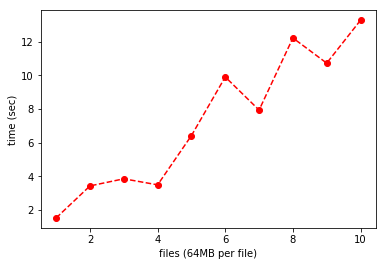

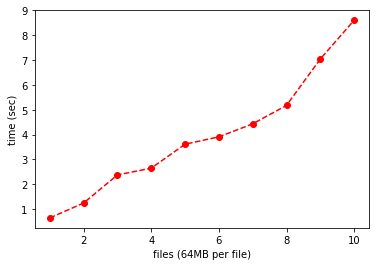

In [43]:
plotMeanLine(dfBigFileNfsDown)
plotTop25Line(dfBigFileNfsDown)

上傳下載比較

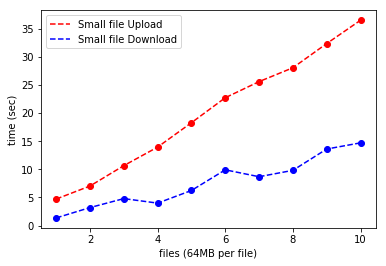

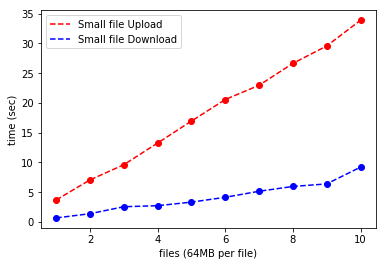

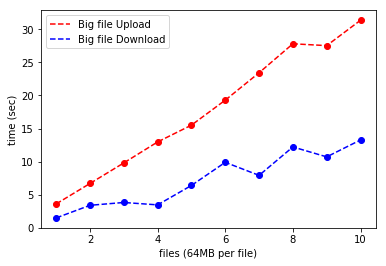

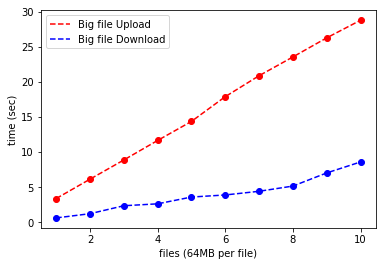

In [44]:
fig = plt.figure()
plt.xlabel('files (64MB per file)')
plt.ylabel('time (sec)')
plt.plot(testList, list(dfSmallFileNfs.describe().iloc[1]), 'ro')
plt.plot(testList, dfSmallFileNfs.describe().iloc[1], 'r--', label='Small file Upload')
plt.plot(testList, list(dfSmallFileNfsDown.describe().iloc[1]), 'bo')
plt.plot(testList, dfSmallFileNfsDown.describe().iloc[1], 'b--', label='Small file Download')
plt.legend(loc='upper left')

fig = plt.figure()
plt.xlabel('files (64MB per file)')
plt.ylabel('time (sec)')
plt.plot(testList, list(dfSmallFileNfs.describe().iloc[4]), 'ro')
plt.plot(testList, dfSmallFileNfs.describe().iloc[4], 'r--', label='Small file Upload')
plt.plot(testList, list(dfSmallFileNfsDown.describe().iloc[4]), 'bo')
plt.plot(testList, dfSmallFileNfsDown.describe().iloc[4], 'b--', label='Small file Download')
plt.legend(loc='upper left')

fig = plt.figure()
plt.xlabel('files (64MB per file)')
plt.ylabel('time (sec)')
plt.plot(testList, list(dfBigFileNfs.describe().iloc[1]), 'ro')
plt.plot(testList, dfBigFileNfs.describe().iloc[1], 'r--', label='Big file Upload')
plt.plot(testList, list(dfBigFileNfsDown.describe().iloc[1]), 'bo')
plt.plot(testList, dfBigFileNfsDown.describe().iloc[1], 'b--', label='Big file Download')
plt.legend(loc='upper left')

fig = plt.figure()
plt.xlabel('files (64MB per file)')
plt.ylabel('time (sec)')
plt.plot(testList, list(dfBigFileNfs.describe().iloc[4]), 'ro')
plt.plot(testList, dfBigFileNfs.describe().iloc[4], 'r--', label='Big file Upload')
plt.plot(testList, list(dfBigFileNfsDown.describe().iloc[4]), 'bo')
plt.plot(testList, dfBigFileNfsDown.describe().iloc[4], 'b--', label='Big file Download')
plt.legend(loc='upper left')

大小檔案上傳比較

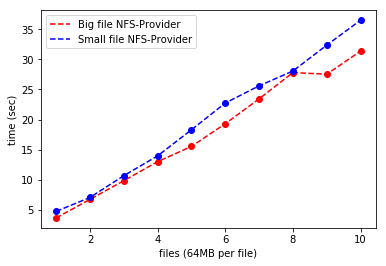

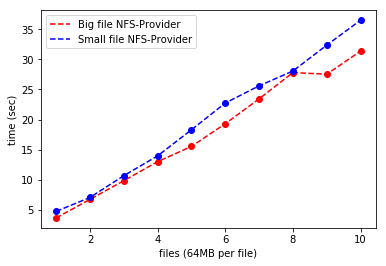

In [45]:
fig = plt.figure()
plt.xlabel('files (64MB per file)')
plt.ylabel('time (sec)')
plt.plot(testList, list(dfBigFileNfs.describe().iloc[1]), 'ro')
plt.plot(testList, dfBigFileNfs.describe().iloc[1], 'r--', label='Big file NFS-Provider')
plt.plot(testList, list(dfSmallFileNfs.describe().iloc[1]), 'bo')
plt.plot(testList, dfSmallFileNfs.describe().iloc[1], 'b--', label='Small file NFS-Provider')
plt.legend(loc='upper left')

fig = plt.figure()
plt.xlabel('files (64MB per file)')
plt.ylabel('time (sec)')
plt.plot(testList, list(dfBigFileNfs.describe().iloc[1]), 'ro')
plt.plot(testList, dfBigFileNfs.describe().iloc[1], 'r--', label='Big file NFS-Provider')
plt.plot(testList, list(dfSmallFileNfs.describe().iloc[1]), 'bo')
plt.plot(testList, dfSmallFileNfs.describe().iloc[1], 'b--', label='Small file NFS-Provider')
plt.legend(loc='upper left')

大小檔案下載比較

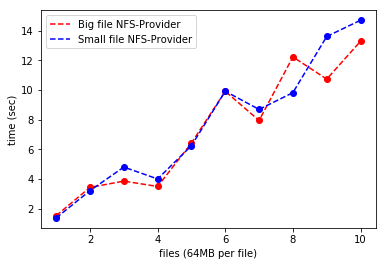

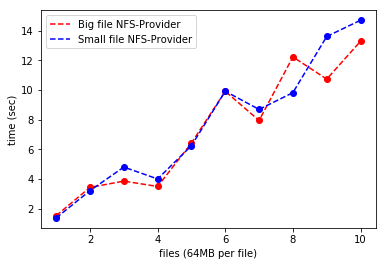

In [46]:
fig = plt.figure()
plt.xlabel('files (64MB per file)')
plt.ylabel('time (sec)')
plt.plot(testList, list(dfBigFileNfsDown.describe().iloc[1]), 'ro')
plt.plot(testList, dfBigFileNfsDown.describe().iloc[1], 'r--', label='Big file NFS-Provider')
plt.plot(testList, list(dfSmallFileNfsDown.describe().iloc[1]), 'bo')
plt.plot(testList, dfSmallFileNfsDown.describe().iloc[1], 'b--', label='Small file NFS-Provider')
plt.legend(loc='upper left')

fig = plt.figure()
plt.xlabel('files (64MB per file)')
plt.ylabel('time (sec)')
plt.plot(testList, list(dfBigFileNfsDown.describe().iloc[1]), 'ro')
plt.plot(testList, dfBigFileNfsDown.describe().iloc[1], 'r--', label='Big file NFS-Provider')
plt.plot(testList, list(dfSmallFileNfsDown.describe().iloc[1]), 'bo')
plt.plot(testList, dfSmallFileNfsDown.describe().iloc[1], 'b--', label='Small file NFS-Provider')
plt.legend(loc='upper left')

比較 無儲存後端、Longhorn、NFS-Provider 每個64MB檔案 逐一上傳速度

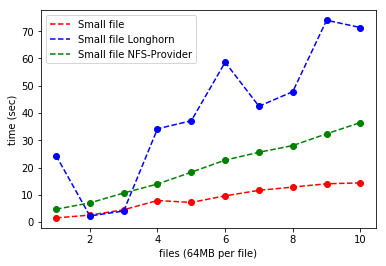

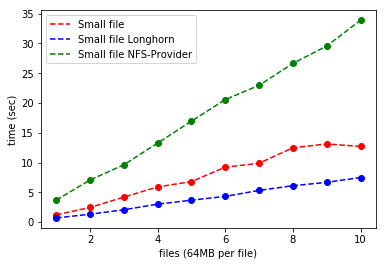

In [47]:
fig = plt.figure()
plt.xlabel('files (64MB per file)')
plt.ylabel('time (sec)')
plt.plot(testList, list(dfSmallFile.describe().iloc[1]), 'ro')
plt.plot(testList, dfSmallFile.describe().iloc[1], 'r--', label='Small file')
plt.plot(testList, list(dfSmallFileLonghorn.describe().iloc[1]), 'bo')
plt.plot(testList, dfSmallFileLonghorn.describe().iloc[1], 'b--', label='Small file Longhorn')
plt.plot(testList, list(dfSmallFileNfs.describe().iloc[1]), 'go')
plt.plot(testList, dfSmallFileNfs.describe().iloc[1], 'g--', label='Small file NFS-Provider')
plt.legend(loc='upper left')

fig = plt.figure()
plt.xlabel('files (64MB per file)')
plt.ylabel('time (sec)')
plt.plot(testList, list(dfSmallFile.describe().iloc[4]), 'ro')
plt.plot(testList, dfSmallFile.describe().iloc[4], 'r--', label='Small file')
plt.plot(testList, list(dfSmallFileLonghorn.describe().iloc[4]), 'bo')
plt.plot(testList, dfSmallFileLonghorn.describe().iloc[4], 'b--', label='Small file Longhorn')
plt.plot(testList, list(dfSmallFileNfs.describe().iloc[4]), 'go')
plt.plot(testList, dfSmallFileNfs.describe().iloc[4], 'g--', label='Small file NFS-Provider')
plt.legend(loc='upper left')

比較 無儲存後端、Longhorn、NFS-Provider 每個64MB檔案 逐一下載速度

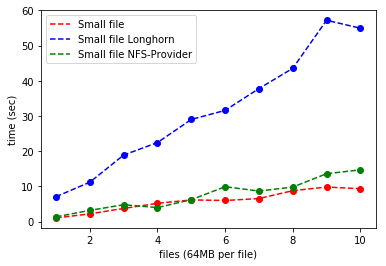

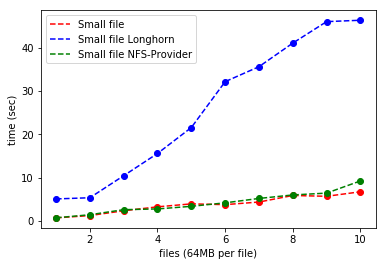

In [48]:
fig = plt.figure()
plt.xlabel('files (64MB per file)')
plt.ylabel('time (sec)')
plt.plot(testList, list(dfSmallFileDown.describe().iloc[1]), 'ro')
plt.plot(testList, dfSmallFileDown.describe().iloc[1], 'r--', label='Small file')
plt.plot(testList, list(dfSmallFileLonghornDown.describe().iloc[1]), 'bo')
plt.plot(testList, dfSmallFileLonghornDown.describe().iloc[1], 'b--', label='Small file Longhorn')
plt.plot(testList, list(dfSmallFileNfsDown.describe().iloc[1]), 'go')
plt.plot(testList, dfSmallFileNfsDown.describe().iloc[1], 'g--', label='Small file NFS-Provider')
plt.legend(loc='upper left')

fig = plt.figure()
plt.xlabel('files (64MB per file)')
plt.ylabel('time (sec)')
plt.plot(testList, list(dfSmallFileDown.describe().iloc[4]), 'ro')
plt.plot(testList, dfSmallFileDown.describe().iloc[4], 'r--', label='Small file')
plt.plot(testList, list(dfSmallFileLonghornDown.describe().iloc[4]), 'bo')
plt.plot(testList, dfSmallFileLonghornDown.describe().iloc[4], 'b--', label='Small file Longhorn')
plt.plot(testList, list(dfSmallFileNfsDown.describe().iloc[4]), 'go')
plt.plot(testList, dfSmallFileNfsDown.describe().iloc[4], 'g--', label='Small file NFS-Provider')
plt.legend(loc='upper left')

比較 無儲存後端、Longhorn、NFS-Provider 每組檔案打包成tar直接上傳

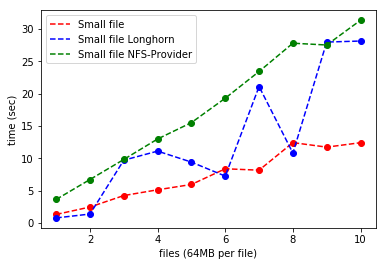

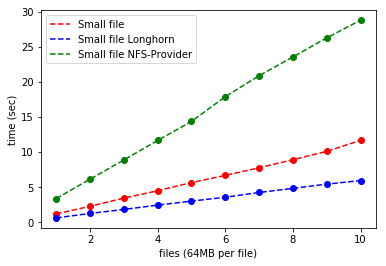

In [49]:
fig = plt.figure()
plt.xlabel('files (64MB per file)')
plt.ylabel('time (sec)')
plt.plot(testList, list(dfBigFile.describe().iloc[1]), 'ro')
plt.plot(testList, dfBigFile.describe().iloc[1], 'r--', label='Small file')
plt.plot(testList, list(dfBigFileLonghorn.describe().iloc[1]), 'bo')
plt.plot(testList, dfBigFileLonghorn.describe().iloc[1], 'b--', label='Small file Longhorn')
plt.plot(testList, list(dfBigFileNfs.describe().iloc[1]), 'go')
plt.plot(testList, dfBigFileNfs.describe().iloc[1], 'g--', label='Small file NFS-Provider')
plt.legend(loc='upper left')

fig = plt.figure()
plt.xlabel('files (64MB per file)')
plt.ylabel('time (sec)')
plt.plot(testList, list(dfBigFile.describe().iloc[4]), 'ro')
plt.plot(testList, dfBigFile.describe().iloc[4], 'r--', label='Small file')
plt.plot(testList, list(dfBigFileLonghorn.describe().iloc[4]), 'bo')
plt.plot(testList, dfBigFileLonghorn.describe().iloc[4], 'b--', label='Small file Longhorn')
plt.plot(testList, list(dfBigFileNfs.describe().iloc[4]), 'go')
plt.plot(testList, dfBigFileNfs.describe().iloc[4], 'g--', label='Small file NFS-Provider')
plt.legend(loc='upper left')

比較 無儲存後端、Longhorn、NFS-Provider 每組檔案打包成tar直接下載

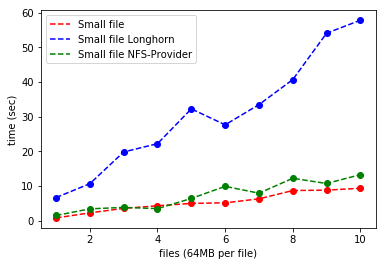

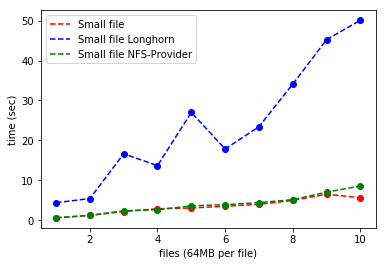

In [50]:
fig = plt.figure()
plt.xlabel('files (64MB per file)')
plt.ylabel('time (sec)')
plt.plot(testList, list(dfBigFileDown.describe().iloc[1]), 'ro')
plt.plot(testList, dfBigFileDown.describe().iloc[1], 'r--', label='Small file')
plt.plot(testList, list(dfBigFileLonghornDown.describe().iloc[1]), 'bo')
plt.plot(testList, dfBigFileLonghornDown.describe().iloc[1], 'b--', label='Small file Longhorn')
plt.plot(testList, list(dfBigFileNfsDown.describe().iloc[1]), 'go')
plt.plot(testList, dfBigFileNfsDown.describe().iloc[1], 'g--', label='Small file NFS-Provider')
plt.legend(loc='upper left')

fig = plt.figure()
plt.xlabel('files (64MB per file)')
plt.ylabel('time (sec)')
plt.plot(testList, list(dfBigFileDown.describe().iloc[4]), 'ro')
plt.plot(testList, dfBigFileDown.describe().iloc[4], 'r--', label='Small file')
plt.plot(testList, list(dfBigFileLonghornDown.describe().iloc[4]), 'bo')
plt.plot(testList, dfBigFileLonghornDown.describe().iloc[4], 'b--', label='Small file Longhorn')
plt.plot(testList, list(dfBigFileNfsDown.describe().iloc[4]), 'go')
plt.plot(testList, dfBigFileNfsDown.describe().iloc[4], 'g--', label='Small file NFS-Provider')
plt.legend(loc='upper left')